# Second derivative

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [3]:
df = df[-1_000_000:]

In [5]:
ema = 1000

df = (pd.DataFrame()
            .assign(price=df.close)
            .assign(ema=df.close.ewm(ema).mean()))
df["d"] = df.ema.diff()
df["dd"] = df.d.diff()

In [8]:
df.tail(4)

,price,ema,d,dd
time,,,,
2021-06-19 16:27:20.667,35823.32,35996.698702,-0.173379,-0.018047
2021-06-19 16:27:26.627,35826.83,35996.529003,-0.169699,0.003680
2021-06-19 16:27:44.405,35847.95,35996.380572,-0.148431,0.021268
2021-06-19 16:27:48.270,35839.87,35996.224218,-0.156354,-0.007924


In [32]:
def get_up_cross(df):
    crit1 = df.dd.shift(1) < 0.1
    crit2 = df.dd > 0.1
    crit3 = df.d > 0
    return df.price[(crit1) & (crit2) & (crit3)]

def get_down_cross(df):
    crit1 = df.dd.shift(1) > -.1
    crit2 = df.dd < -.1
    crit3 = df.d < 0
    return df.price[(crit1) & (crit2) & (crit3)]

up = get_up_cross(df)
down = get_down_cross(df)

In [33]:
side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()
side

time
2021-04-23 06:55:25.319   -1
2021-04-23 06:55:29.496    1
2021-04-23 06:55:44.167    1
2021-04-23 06:55:53.783   -1
2021-04-23 06:56:06.612   -1
                          ..
2021-06-16 12:17:42.445   -1
2021-06-17 17:20:28.024   -1
2021-06-18 14:41:33.971   -1
2021-06-18 19:17:50.856    1
2021-06-18 19:17:51.059   -1
Length: 2019, dtype: int64

In [7]:
side.to_csv("../data/side.csv")

## Plotting

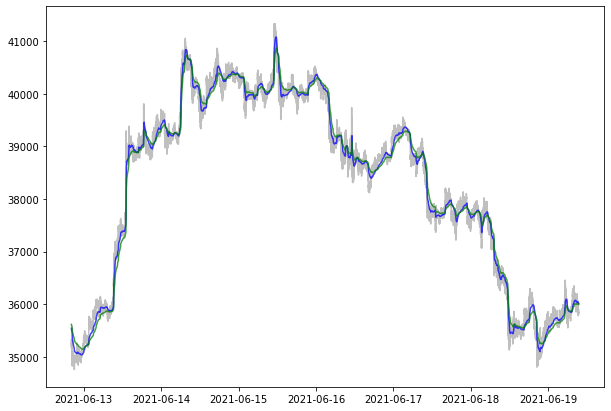

In [24]:
plot = df0[-100_000:]
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(plot.price, color="gray", alpha=.5)
ax.plot(plot.fast, color="blue", alpha=.75)
ax.plot(plot.slow, color="green", alpha=.75)

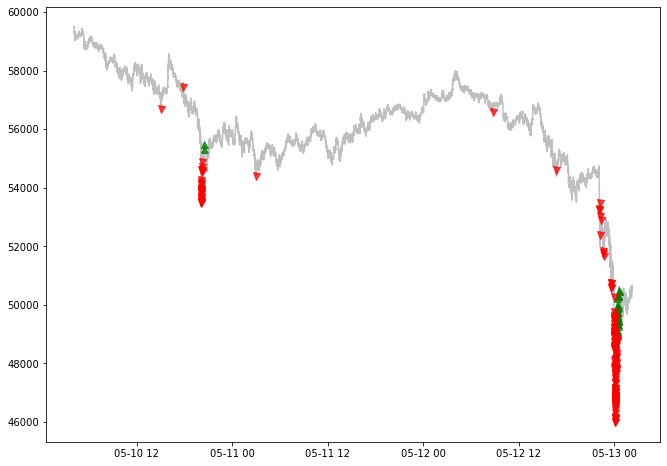

In [37]:
plot = df
plot["up"] = up
plot["down"] = down
plot = plot[-800_000:-750_000]

fig, ax = plt.subplots(figsize=(11,8))

# close_df.loc['2014':].plot(ax=ax, alpha=.5)
ax.plot(plot.price, alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r')




In [24]:
up.index[1]

Timestamp('2021-01-08 20:22:46.714000')

In [26]:
df.loc[up.index[1]]

open      40000.030000
high      40020.590000
low       40000.030000
close     40020.430000
volume        2.508191
Name: 2021-01-08 20:22:46.714000, dtype: float64